# Regresja Liniowa
Metoda ta polega na dopasowaniu parametrów modelu tak, aby jak najlepiej szacował daną wartość. <br/>
Przyjmijmy, że chcielibyśmy wyznaczyć korelację pomiędzy doświadczeniem a zarobkami na rynku pracy w sektorze IT. W tym celu posłużymy się modelem funkcji liniowej.


### Funkcja Liniowa  
W tym przykładzie skupimy się na znanej wszystkim funkcji liniowej: <br/>

$$  
y = ax + b  
$$  

<br/>

Na początku wygenerujmy przykładowe dane testowe, posługując się równaniem:  
$$  
y = ax + b + e  
$$  
Gdzie \( e \) będzie odchyleniem wprowadzającym losowość do naszych danych. <br/>  
W tym przykładzie:  
- Przyjmiemy z góry poszukiwane parametry \( a \) i \( b \)  
- Na ich podstawie wygenerujemy dane, na podstawie których nauczymy nasz model  
- Przejdziemy proces nauki modelu


### Import potrzbnych bibliotek

In [20]:
import numpy as np
from src.regression_back import figure1, figure2, figure3, animate_training

## Generowanie danych
**Za parametry modelu przyjmiemy:**  
a = 2  oraz  b = 5. Na ich podstawie wygenerujemy przykładowe dane, dodając do nich losowe odchylenie e.
 

In [21]:
true_a = 2
true_b = 5
N = 100


np.random.seed(42) # W trackie projektów związanych z uczeniem maszynowym przyjmujemy jedno ziarno generatora liczb pseudolosowych

x = 10*np.random.rand(N, 1)
e = 1 * np.random.randn(N, 1)
y = true_a * x + true_b + e

### Podział danych na dane treningowe i walidacyjne
Na podstawie danych treningowych model się uczy, natomiast na danych walidacyjnych sprawdza swoją poprawność.

In [22]:
# mieszanie daych
idx = np.arange(N)
np.random.shuffle(idx)

# 80% danych do uczenia
train_idx = idx[: int(N * 0.8)]
# 20% do walidacj
val_idx = idx[int(N * 0.8) :]

# podział na zbiory uczący i walidacyjny
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Dane treningowe'}, xlabel='X - lata doświadczenia', ylabel='Y - zarobki [tys. zł]'>,
        <Axes: title={'center': 'Dane walidacyjne'}, xlabel='X - lata doświadczenia', ylabel='Y - zarobki [tys. zł]'>],
       dtype=object))

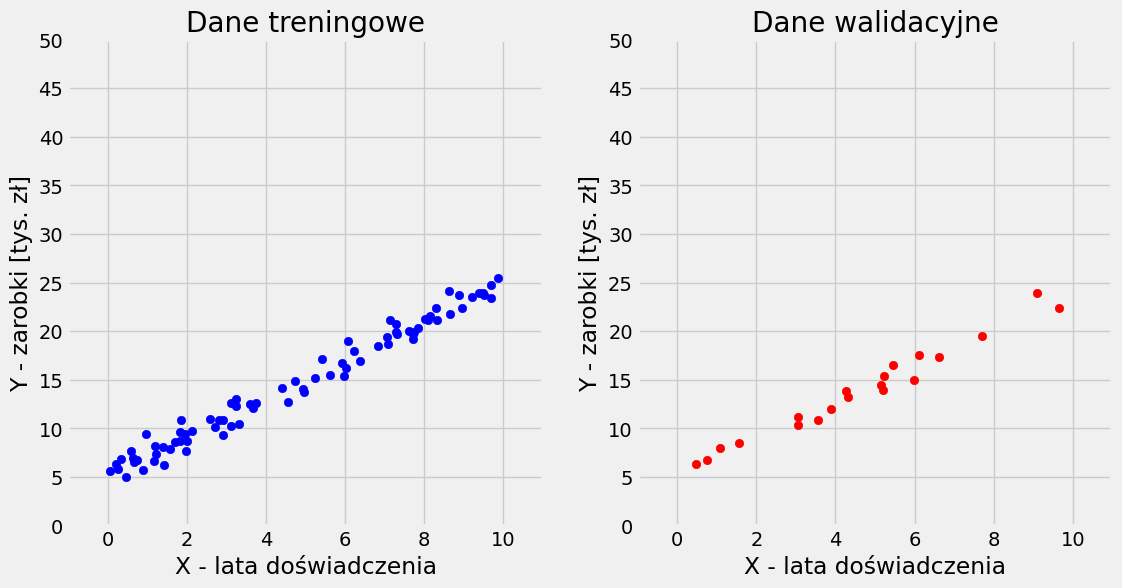

In [23]:
figure1(x_train, y_train, x_val, y_val)

# Nauka modelu - dopasowanie parametrów
W tym momencie zapominamy o wartościach 
a i b, których użyliśmy do stworzenia danych. Przechodzimy przez proces dopasowania parametrów modelu na podstawie dostępnych danych.

### 0. Ustawienie parametrów a i b na losowe
Ponieważ losowe parametry są dobre jak każde inne:


In [24]:
a = np.random.randn(1)
b = np.random.randn(1)

print(f"Początkowe a: {a}, b: {b}")

Początkowe a: [-2.02514259], b: [0.18645431]


### 1. Obliczenie oszacowania modelu


(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='X - lata doświadczenia', ylabel='Y - zarobki [tys. zł]'>)

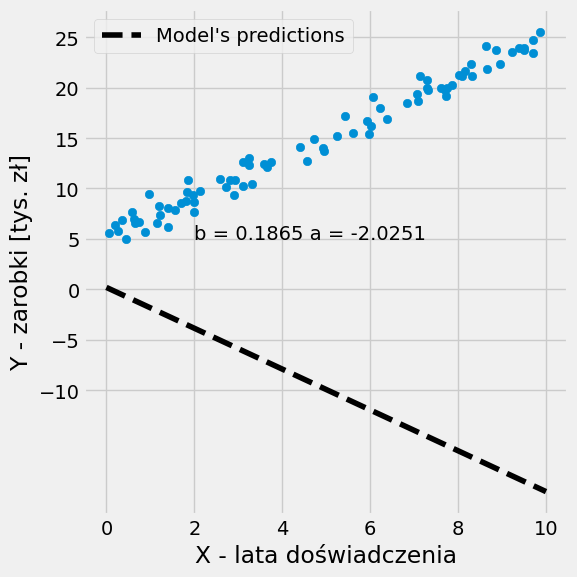

In [25]:
y_pred = a * x_train + b
figure2(x_train,y_train,b,a)

### 2. Obliczenie funkcji stary
**Funkcja straty mówi nam, jak duży błąd popełnia nasz model.**<br/>  
W tym przykładzie posłużymy się funkcją straty błędu średniokwadratowego (ang. *Mean Squared Error* – MSE).


Najpierw obliczymy błąd, czyli pomyłkę modelu
$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='X - lata doświadczenia', ylabel='Y - zarobki [tys. zł]'>)

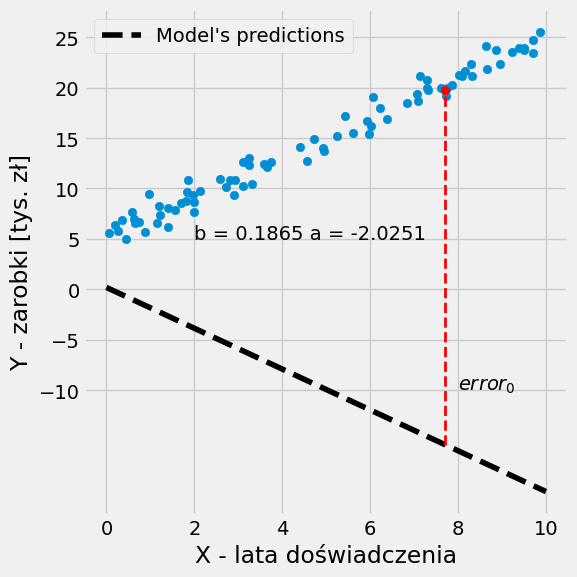

In [26]:
figure3(x_train, y_train, b, a)

### MSE - Mean Square Error
Obliczmy wartość MSE, która dodatkowo spotęguje pomyłkę modelu:
$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + a x_i - y_i)}^2
\end{aligned}
$$

In [27]:
error = y_pred - y_train
loss = np.mean(error**2)
print(f"Loss: {loss}")

Loss: 722.5416680995677


# 3. Obliczenie gradientu
**Tutaj zaczynają się bardziej skomplikowane tematy, które masz okazję poznać, studiując na AGH i dołączając do KN AI Med AGH.**  
W skrócie, można powiedzieć, że gradient wskaże nam, w jakim kierunku powinniśmy zmieniać nasze parametry. Wyliczymy go na podstawie funkcji straty.


In [28]:
b_grad = 2 * error.mean()
a_grad = 2 * (x_train * error).mean()
print(b_grad, a_grad)

-47.83893881394109 -300.92779756066403


# 4. Aktualizowanie parametrów
**Mając wyliczony gradient, możemy przystąpić do aktualizowania parametrów.** W tym momencie warto wspomnieć o jednym z parametrów używanych w uczeniu maszynowym — jest nim *learning rate*. Określa on skalę zmiany naszych parametrów, więc jest jednym z najważniejszych hiperparametrów


$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
a &= a - \eta \frac{\partial{\text{MSE}}}{\partial{a}}
\end{aligned}
$$

Dizwna Grecka literka $\eta$ oznacza learing rate. Natomiast ułamki typu  $\frac{\partial{\text{MSE}}}{\partial{b}}$ to pochodne cząstkowe będące składowymi gradientu. Tak jak wspominałem są to rzeczy, których nauczysz się na studiach.

[-2.02514259] [0.18645431]
-300.92779756066403 -47.83893881394109
[0.98413539] [0.6648437]


(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='X - lata doświadczenia', ylabel='Y - zarobki [tys. zł]'>)

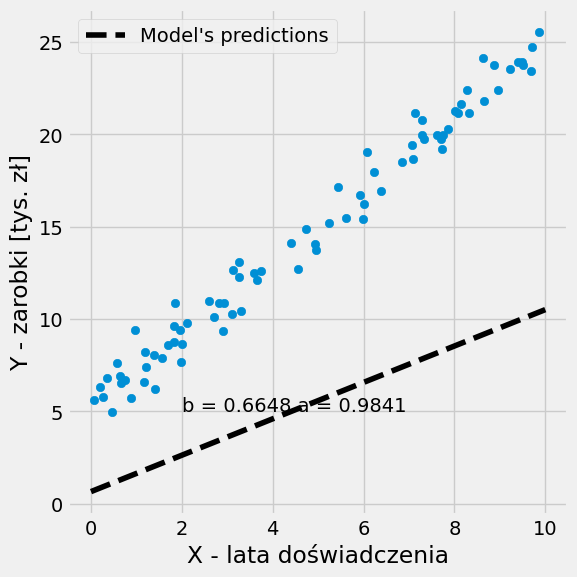

In [29]:

lr = 0.01

print(a, b)
b = b - lr * b_grad
a = a - lr * a_grad

print(a_grad, b_grad)
print(a, b)
figure2(x_train,y_train,b,a)

# 5. Powtarzaj do skutku
Ostatnim korkiem treningu modelu jest wielokrotne powtórzenie poprzednich kroków:
1. Obliczenie predykcji modelu
2. Obliczenie fukncji straty - czyli błędu
3. Obliczenie gradientu - czyli kierunku, w którym parametry odbiegają od optimum
4. aktualizacja parametrów

Jeden cykl nauki modelu nazywamy jednym epochem.

In [30]:
epoch = 1000
lr = 0.01

for i in range(epoch):
    y_pred = a * x_train + b
    error = y_pred - y_train
    loss = np.mean(error**2)
    b_grad = 2 * error.mean()
    a_grad = 2 * (x_train * error).mean()
    b = b - lr * b_grad
    a = a - lr * a_grad
    

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='X - lata doświadczenia', ylabel='Y - zarobki [tys. zł]'>)

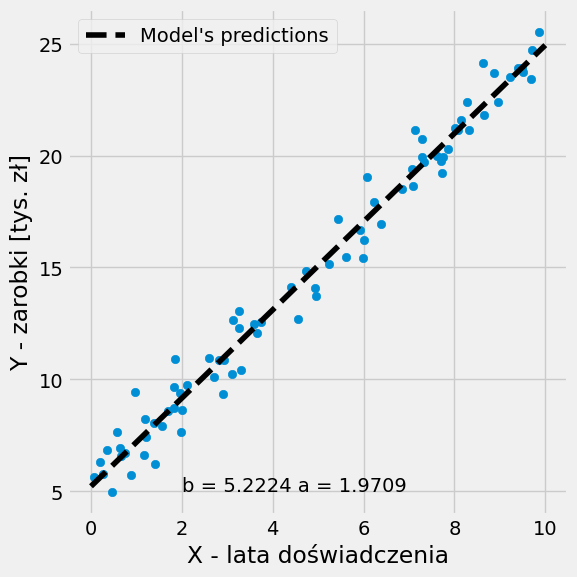

In [31]:
figure2(x_train,y_train,b,a)

Przypomnienie:
- true_a = 2
- true_b = 5